In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset1 = pd.read_csv(r'amazonTop1ReadyForML.csv')
dataset1 = dataset1.set_index('date')

In [3]:
# Removing the first 7 days from the data set
dataset1 = dataset1.iloc[7:,:]
dataset1

,Profit_OMR-BP742N,Avg. return on sales_OMR-BP742N,7dayRosAverage,7dayRosAverage*100,Distinct count of order id_OMR-BP742N,quantity_OMR-BP742N,7DaySumOfQTY,profitPerQuantitySold_OMR-BP742N,profitPerOrderMade_OMR-BP742N,net32Top1ItemAvg.weeklyReturn,net32Top1ItemAvg.weeklyReturn*100,Prediction_OMR-BP742N
date,,,,,,,,,,,,
2019-01-08,130,0.3181,0.2773,277.0,6,6,46.0,22,22,0.108100,108.0,1.0
2019-01-09,65,0.3181,0.3227,323.0,3,3,52.0,22,22,0.214100,214.0,1.0
2019-01-10,65,0.3181,0.3232,323.0,3,3,48.0,22,22,0.320100,320.0,1.0
2019-01-11,51,0.3519,0.3214,321.0,2,2,40.0,25,25,0.426100,426.0,0.0
2019-01-12,0,0.0000,0.3244,324.0,0,0,36.0,0,0,0.532100,532.0,0.0
2019-01-13,0,0.0000,0.2772,277.0,0,0,35.0,0,0,0.532100,532.0,0.0
2019-01-14,43,0.3181,0.2306,231.0,2,2,32.0,22,22,0.532100,532.0,0.0
2019-01-15,0,0.0000,0.2320,232.0,0,0,16.0,0,0,0.424000,424.0,0.0
2019-01-16,0,0.0000,0.1866,187.0,0,0,10.0,0,0,0.424000,424.0,0.0


In [4]:
# for i in dataset1.columns:
dataset1.columns

Index(['Profit_OMR-BP742N', 'Avg. return on sales_OMR-BP742N',
       '7dayRosAverage', '7dayRosAverage*100',
       'Distinct count of order id_OMR-BP742N', 'quantity_OMR-BP742N',
       '7DaySumOfQTY', 'profitPerQuantitySold_OMR-BP742N',
       'profitPerOrderMade_OMR-BP742N', 'net32Top1ItemAvg.weeklyReturn',
       'net32Top1ItemAvg.weeklyReturn*100', 'Prediction_OMR-BP742N'],
      dtype='object')

In [5]:
dataset1.dtypes

Profit_OMR-BP742N                          int64
Avg. return on sales_OMR-BP742N          float64
7dayRosAverage                           float64
7dayRosAverage*100                       float64
Distinct count of order id_OMR-BP742N      int64
quantity_OMR-BP742N                        int64
7DaySumOfQTY                             float64
profitPerQuantitySold_OMR-BP742N           int64
profitPerOrderMade_OMR-BP742N              int64
net32Top1ItemAvg.weeklyReturn            float64
net32Top1ItemAvg.weeklyReturn*100        float64
Prediction_OMR-BP742N                    float64
dtype: object

In [6]:
for i in dataset1.columns:
    if i == '7dayRosAverage'   or i == 'Avg. return on sales_OMR-BP742N'\
    or i == 'net32Top1ItemAvg.weeklyReturn' :
        continue
    dataset1[f"{i}"] = dataset1[f"{i}"].astype(np.int64) 

In [7]:
dataset1.dtypes

Profit_OMR-BP742N                          int64
Avg. return on sales_OMR-BP742N          float64
7dayRosAverage                           float64
7dayRosAverage*100                         int64
Distinct count of order id_OMR-BP742N      int64
quantity_OMR-BP742N                        int64
7DaySumOfQTY                               int64
profitPerQuantitySold_OMR-BP742N           int64
profitPerOrderMade_OMR-BP742N              int64
net32Top1ItemAvg.weeklyReturn            float64
net32Top1ItemAvg.weeklyReturn*100          int64
Prediction_OMR-BP742N                      int64
dtype: object

In [8]:
XX = dataset1.iloc[:,[0,6]].values
yy = dataset1.iloc[:,-1].values

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.25, random_state = 0)

In [10]:
# Applying feature scaling for a more accurate predictions for
# which users will buy or not an SUV, targeting users 
from sklearn.preprocessing import StandardScaler
sc_XX = StandardScaler()
XX_train = sc_XX.fit_transform(XX_train)
XX_test = sc_XX.transform(XX_test)

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(XX_train,yy_train)

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# Introducing a new variable: the vector of predictions,
# a vector which gives a prediction for each of the test set observations 
yy_pred = classifier.predict(XX_test)

In [13]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(yy_test, yy_pred) 
cm 

array([[48,  6],
       [14,  8]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


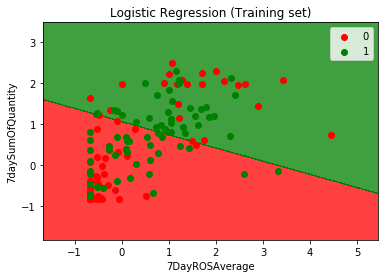

In [14]:
from matplotlib.colors import ListedColormap
XX_set, yy_set = XX_train, yy_train
X1, X2 = np.meshgrid(np.arange(start = XX_set[:, 0].min() - 1, stop = XX_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = XX_set[:, 1].min() - 1, stop = XX_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(yy_set)):
    plt.scatter(XX_set[yy_set == j, 0], XX_set[yy_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('7DayROSAverage')
plt.ylabel('7daySumOfQuantity')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


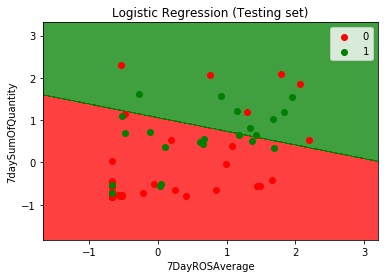

In [15]:
from matplotlib.colors import ListedColormap
XX_set, yy_set = XX_test, yy_test
X1, X2 = np.meshgrid(np.arange(start = XX_set[:, 0].min() - 1, stop = XX_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = XX_set[:, 1].min() - 1, stop = XX_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(yy_set)):
    plt.scatter(XX_set[yy_set == j, 0], XX_set[yy_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('7DayROSAverage')
plt.ylabel('7daySumOfQuantity')
plt.legend()
plt.show()